California Housing Census Data is used to build model to predict house value based on input data.

In [1]:
import pandas as pd

In [2]:
#Getting the data
housing = pd.read_csv('/cxldata/datasets/project/housing/housing.csv')

In [3]:
housing.head() # Shows first 5 rows or 5 lines?


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Displays all categories and their count values
housing.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-114.31    34.19     15.0                5612.0       1283.0          1015.0      472.0       1.4936         66900.0             INLAND             1
-121.20    39.25     5.0                 906.0        144.0           376.0       141.0       4.3523         188200.0            INLAND             1
           38.67     26.0                1546.0       287.0           773.0       299.0       2.9803         115400.0            INLAND             1
           38.68     9.0                 2200.0       422.0           938.0       369.0       3.4896         143800.0            INLAND             1
           38.69     26.0                3077.0       607.0           1603.0      595.0       2.7174         137500.0            INLAND             1
                                                                                                         

In [5]:
#displays value count of only attribute ocean_proximity
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# describe() = Statistical description
#Only numerical vlaue by default
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# including other parameters
# describe_all = housing.describe(include = all)

Standard deviation = how spread apart the data is from mean value.

Variance is how varied the data is??

    Std = (variance)^2
    Variance = sum((data_value - mean)^2)/N
    Std = sqrt(sum((data_value - mean)^2)/N)

<h3>Plotting</h3>
We do this generally for numerical attributes as we can see the count of instances belonging to each category of a categorical attribute by value_counts() method of the DataFrame object which we have done before, because it gives us exact figures of the count.

We plot a histogram by calling the hist() method of the DataFrame object. It calls the hist() method of matplotlib.pyplot internally , on each attribute in the DataFrame, resulting in one histogram per column. Hence, we have to first import matplotlib.pyplot to make it work.

Here, matplotlib is a module and pyplot is a sub-module of it. Most of the matplotlib utilities lie under pyplot. It is generally imported under the plt alias.

In [3]:
import matplotlib

We use magic function, for plotting, as this extends notebook's capability.

matplotlib inline --> plots and graphs are shown next to the code in our notebook and are stored within the notebook. Otherwise, the plots and graphs are displayed in a separate window and not within our notebook.

matplotlib inline starts with a % sign as it is a line magic function. So, run the following command before working with matplotlib in Jupyter notebook.

In [4]:
%matplotlib inline

importing submodule pyplot from matplotlib

2 ways:
1. from module_name import submodule_name as alias
2. import module_name.submodule_name as alias

In [5]:
import matplotlib.pyplot as plt

Plotting histograms:
Method hist()
2 attributes:
    1. figsize - size of output fig.
    2. bins- number of histogram bins used

In [26]:
# figsize = (15,10)
# bins = 50
# housing.hist(figsize,bins=50)
# These code not working, 
# maybe the parameters are to be specified along with 
# parameter name.

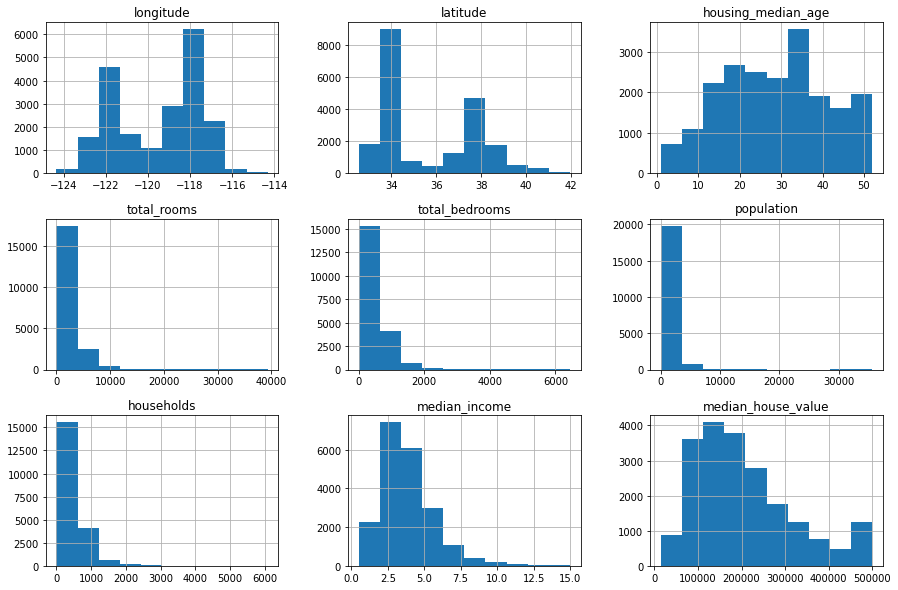

In [11]:
hist_plt = housing.hist(figsize = (15,10),bins = 10)

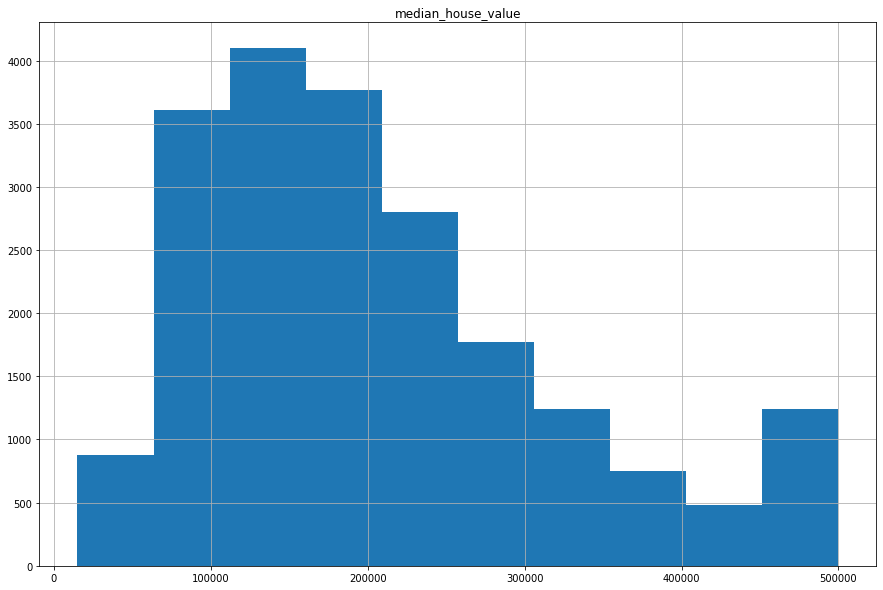

In [12]:
hist_plt_1 = housing.hist(column = 'median_house_value',figsize = (15,10),bins = 10)

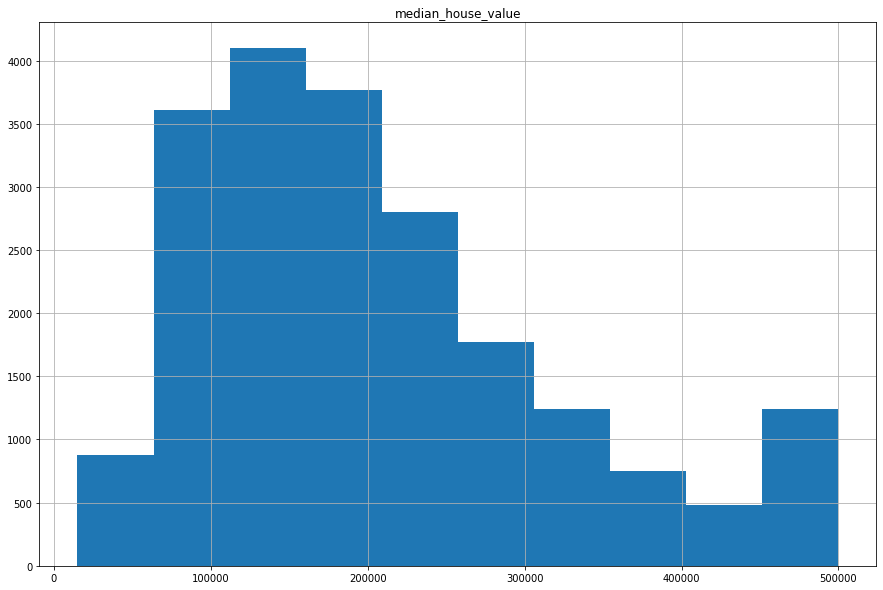

In [13]:
hist_plt_1 = housing.hist(column = 'median_house_value',figsize = (15,10),bins = 10)

In [17]:
#Splitting median_income attribute of dataset and is stored in income_cat

In [6]:
bins = [0, 1.5, 3, 4.5, 6, 16]
labels = [1, 2, 3, 4, 5]
income_cat = pd.cut(housing['median_income'], bins=bins, labels=labels)

In [7]:
income_cat.head()

0    5
1    5
2    5
3    4
4    3
Name: median_income, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit

In [9]:
split_object = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2, random_state = 42)

In [10]:
split_object

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [11]:
gen_obj = split_object.split(housing,income_cat)

In [12]:
gen_obj

<generator object BaseShuffleSplit.split at 0x7fba901dbfc0>

In [13]:
train_ind , test_ind = next(gen_obj)

In [77]:
#Slide 52

In [14]:
strat_train_set = housing.loc[train_ind]
strat_test_set = housing.loc[test_ind]

In [16]:
train_copy = strat_train_set.copy()

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

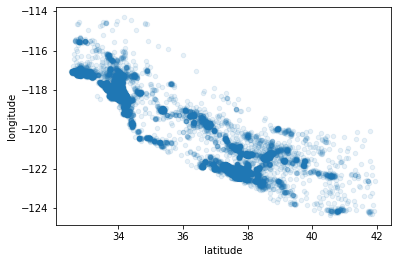

In [17]:
train_copy.plot(kind = 'scatter',x = 'latitude',y = 'longitude',alpha = 0.1)

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter as pltsr

In [19]:
BBox = (train_copy.longitude.min(),   train_copy.longitude.max(),      
         train_copy.latitude.min(), train_copy.latitude.max())

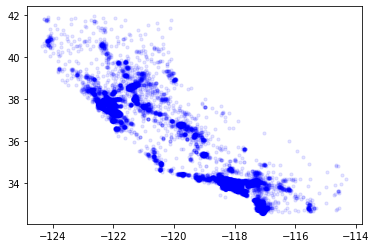

In [20]:
# ax = plt.subplots(figsize = (15,10))
pltsr(train_copy.longitude, train_copy.latitude, zorder=1, alpha= 0.1, c='blue', s=10)

In [118]:
# slide 57

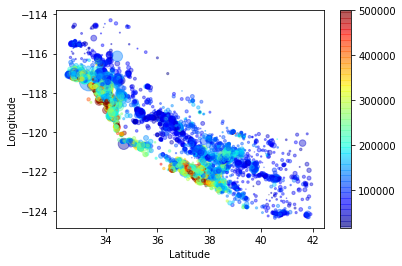

In [21]:
# plot a scatter plot of latitude and longitude
plt.scatter(x=train_copy['latitude'], y=train_copy['longitude'], s=train_copy['population']/100, c=train_copy['median_house_value'], cmap=plt.get_cmap('jet'), alpha=0.4)
plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


In [22]:
# Computing correlation matrix
train_copy.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


array([[<AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='latitude', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_income', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot:xlabel='median_house_va

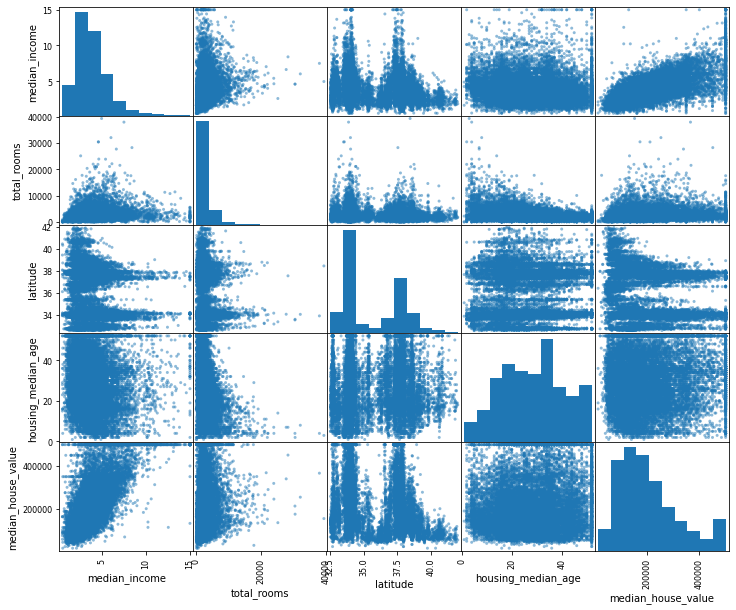

In [23]:
#Scatter matrix
pd.plotting.scatter_matrix(train_copy[["median_income","total_rooms","latitude","housing_median_age","median_house_value"]],figsize=(12,10))
# pd.plotting.scatter_matrix(train_copy[["median_income", "total_rooms", "latitude", "housing_median_age", "median_house_value"]], figsize=(12, 10))


In [24]:
train_copy["rooms_per_household"] = train_copy["total_rooms"]/train_copy["households"]

In [25]:
train_copy["bedrooms_per_room"] = train_copy["total_bedrooms"]/train_copy["total_rooms"]

In [26]:
train_copy["population_per_household"] = train_copy["population"]/train_copy["households"]

In [26]:
train_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [27]:
#Correlation for New Data.
train_copy.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


In [27]:
train_data = strat_train_set.drop(columns='median_house_value')

In [28]:
housing_labels = strat_train_set['median_house_value'].copy()

In [29]:
train_copy.total_bedrooms.describe()

count    16354.000000
mean       534.973890
std        412.699041
min          2.000000
25%        295.000000
50%        433.000000
75%        644.000000
max       6210.000000
Name: total_bedrooms, dtype: float64

In [30]:
sum(train_copy['total_bedrooms'].isna())

158

In [41]:
#Slide 71

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(strategy = 'median')

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [34]:
non_num = ['ocean_proximity']

In [35]:
housing_num = train_data.drop(columns = non_num)

In [36]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [37]:
out = imputer.transform(housing_num)

In [38]:
housing_tr = pd.DataFrame(out,columns = housing_num.columns)

In [39]:
# sum(hosing_tr.isna()) #--> gives Error
housing_tr.isna().sum()
#No Null Values after imputing

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [40]:
#slide 73

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
encoder = OneHotEncoder()

In [43]:
one_hot = encoder.fit_transform(train_data[['ocean_proximity']])

In [44]:
print(type(train_data[['ocean_proximity']]))
# <class 'pandas.core.frame.DataFrame'>
# DataFrame is 2D object

print(type(train_data['ocean_proximity']))
# <class 'pandas.core.series.Series'>
# Series is 1D object 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [45]:
# Custom Transformers Using Pipeline
#Slide 74 and 75

In [46]:
from sklearn.base import BaseEstimator,TransformerMixin
import numpy as np

In [47]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin): 
#Step2
    def __init__(self,add_bedrooms_per_room=True): #Step3
        self.add_bedrooms_per_room = add_bedrooms_per_room #Step 3 part 2
    def fit(self,X,y=None): #Step 4 - TO make it compatible with sklearn
        return self
    def transform(self,X,y=None): #Step 5
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    #Whats Happening in Step 5 ???

In [48]:
#Step 6 Create Object of class CombinedAttributesAdder
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
#Step 7 Use Transform() method of object attr_adder
housing_extra_attribs = attr_adder.transform(train_data.values)

In [49]:
#Feature Scaling Theory # Slide 76

In [50]:
#Slide 77

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
scaled_features = scaler.fit_transform(housing_num)

In [54]:
# Slide 78 #Transforming Pipelines

In [55]:
from sklearn.pipeline import Pipeline

In [56]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

In [57]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [112]:
#Slide 79

In [58]:
from sklearn.compose import ColumnTransformer

In [59]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,list(housing_num)),
    ('cat',OneHotEncoder(),['ocean_proximity'])
])

In [60]:
housing_prepared = full_pipeline.fit_transform(train_data)

In [174]:
housing_prepared.shape

(16512, 16)

In [61]:
#Slide 81 #Training Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lin_reg = LinearRegression()

In [64]:
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
predictions = lin_reg.predict(housing_prepared)

In [146]:
# Slide 82 #Calculating Error

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
lin_rmse = mean_squared_error(housing_labels,predictions,squared=False)

In [166]:
#Slide 83

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
tree_reg = DecisionTreeRegressor()

In [70]:
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [71]:
predictions = tree_reg.predict(housing_prepared)

In [72]:
tree_rmse = mean_squared_error(housing_labels,predictions,squared=False)

In [73]:
tree_rmse # Value is 0, overfitting

0.0

In [179]:
#Slide 86

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring ='neg_root_mean_squared_error',cv = 10)

In [76]:
scores = abs(scores)

In [77]:
print(scores)

[70320.81127307 67084.84730774 70239.90872708 68417.53747628
 70946.66288989 73548.42394785 71117.97831356 70652.08036746
 76320.4950563  69443.23710461]


In [186]:
#Slide 87

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
forest_reg = RandomForestRegressor()

In [80]:
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
predictions = forest_reg.predict(housing_prepared)

In [82]:
forest_rmse = mean_squared_error(housing_labels,predictions,squared=False)

In [83]:
forest_rmse

18753.681913787415

In [84]:
scores = cross_val_score (forest_reg,housing_prepared,housing_labels,scoring='neg_root_mean_squared_error',cv = 10)

In [85]:
scores = abs(scores)

In [86]:
print(scores)

[49393.34311443 47465.49675238 50299.99871402 52655.73774798
 49996.12644398 53182.43652693 48968.50836833 47943.40465315
 52856.64193538 50250.34987231]


In [203]:
#Slide 90 # GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
reg_forest = RandomForestRegressor()

In [89]:
param_grid = {'n_estimators':[3,10,30],'max_features':[2,4,6,8]}

In [90]:
grid_search = GridSearchCV(estimator=reg_forest,param_grid=param_grid,cv = 5,scoring='neg_root_mean_squared_error')

In [91]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [93]:
best_param = grid_search.best_params_

In [101]:
best_param

{'max_features': 6, 'n_estimators': 30}

In [104]:
#Slide 91
#Evaluation Scores for all combination 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

64353.145177046026 {'max_features': 2, 'n_estimators': 3}
55539.09538960109 {'max_features': 2, 'n_estimators': 10}
52902.23474866072 {'max_features': 2, 'n_estimators': 30}
60389.477583402964 {'max_features': 4, 'n_estimators': 3}
52563.57301882781 {'max_features': 4, 'n_estimators': 10}
50600.48075700019 {'max_features': 4, 'n_estimators': 30}
59024.3209866348 {'max_features': 6, 'n_estimators': 3}
52344.30319090244 {'max_features': 6, 'n_estimators': 10}
49965.06181953617 {'max_features': 6, 'n_estimators': 30}
58298.429991690515 {'max_features': 8, 'n_estimators': 3}
52015.203896696556 {'max_features': 8, 'n_estimators': 10}
50226.32585375353 {'max_features': 8, 'n_estimators': 30}


#Slide 92

In [110]:
print(strat_test_set.columns)

# print(X_test.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [122]:
#Slide 92 Step 1

In [175]:
X_test = strat_test_set.drop(columns='median_house_value')

In [178]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,INLAND
...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,INLAND


In [119]:
# Axis can be given default in 1

In [ ]:
#Step 2

In [152]:
y_test = strat_test_set['median_house_value'].copy()

In [153]:
y_test

5241     500001.0
10970    240300.0
20351    218200.0
6568     182100.0
13285    121300.0
           ...   
20519     76400.0
17430    134000.0
4019     311700.0
12107    133500.0
2398      78600.0
Name: median_house_value, Length: 4128, dtype: float64

In [154]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   ocean_proximity     4128 non-null   object 
dtypes: float64(8), object(1)
memory usage: 482.5+ KB


In [188]:
X_test_prepared = full_pipeline.transform(X_test)
#Step 3

In [189]:
X_test_prepared.shape

(4128, 16)

In [ ]:
#Step 4

In [157]:
final_model = grid_search.best_estimator_

In [158]:
final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [123]:
#Step 5

In [199]:
final_predictions = final_model.predict(X_test_prepared)

In [200]:
final_predictions

array([485000.83333333, 282090.        , 215246.66666667, ...,
       301766.66666667, 165413.33333333, 135366.66666667])

In [126]:
#Step 6

In [201]:
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

In [202]:
final_rmse

47808.111916261565